In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os, numpy as np
from scipy import interpolate

In [ ]:
fileNamesD = ["_GR-D-1","_GR-D-2","_GR-D-3","_GR-D-4"]
fileNamesS = ["_GR-S-1","_GR-S-2","_GR-S-3","_GR-S-4"]

dischargeFolder = r"C:\Users\Mattia Colalongo\OneDrive - Novac SRL\Sharezone\Novac Condivisa\R&D materials\Cartelle_Personali\Mattia_Colalongo\LFP_Gr_ST\graphite_capacity\2C\csv\discharge"

step="step_8"
w_single = 6.70e-3 #g of average active in decoated(single) graphite
w_double = 14.15e-3 #g of average active in double graphite

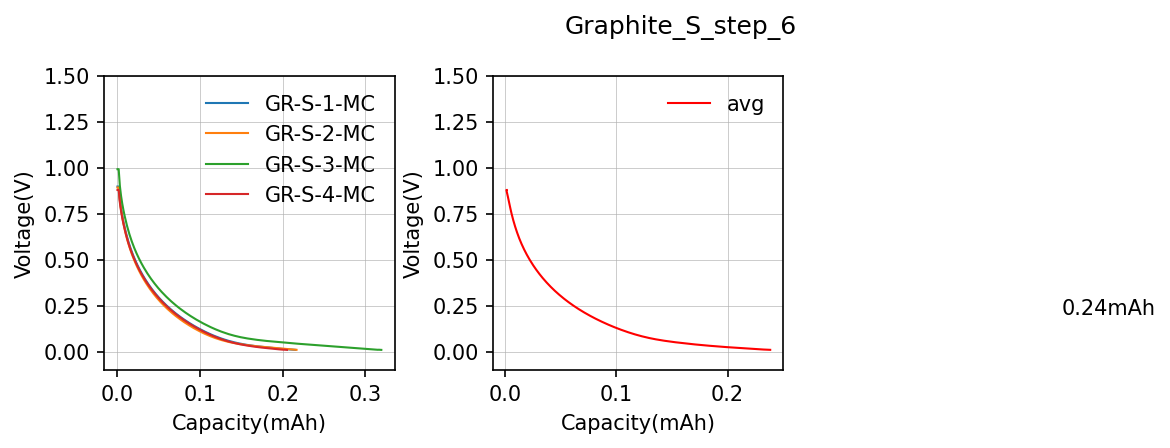

In [3]:
%matplotlib inline
fig, ax = plt.subplots(dpi=150, figsize=(9,3), ncols=2)
avg = []

for i in fileNamesS:
    for j in os.listdir(dischargeFolder):
        if (i in j) and (step in j):
            df = pd.read_csv(os.path.join(dischargeFolder,j))
            ax[0].plot(df['Capacity(Ah)']*1000, df['Voltage(V)'], label=j.split("_")[5], lw=1)
            avg.append([df['Capacity(Ah)']*1000,df['Voltage(V)']])
            
# check the smallest range among the files for V the interpolation
v_low= []
v_up = []
for i in avg:
    v_low.append(i[1].iloc[-1])
    v_up.append(i[1].iloc[0])

v_min = max(v_low)
v_max = min(v_up)


size = len(avg)
voltage = np.zeros(50000) #fixed size
capacity = np.zeros(50000) #fixed size because of interp1d later on
for i in avg:
    v = i[1]
    c = i[0]
    f = interpolate.interp1d(v,c)
    v_new = np.linspace(v_min, v_max, 50000)
    c_new = f(v_new)
    voltage = voltage + v_new
    capacity = capacity + c_new

ax[1].plot(capacity/size, voltage/size, label="avg", lw=1, color='red')
ax[1].text(x=0.5, y=0.2, s="{:.2f}mAh".format(capacity[0]/size))


plt.suptitle(f"Graphite_S_{step}")

for i in ax.ravel():
    i.set_ylim(-0.1, 1.5)
    i.set_xlabel("Capacity(mAh)")
    i.set_ylabel("Voltage(V)")
    i.grid(":", lw=0.3)
    i.legend(frameon=False)

plt.tight_layout()
plt.show()

C:\Users\Mattia Colalongo\AppData\Local\Temp\ipykernel_19444\3896350547.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


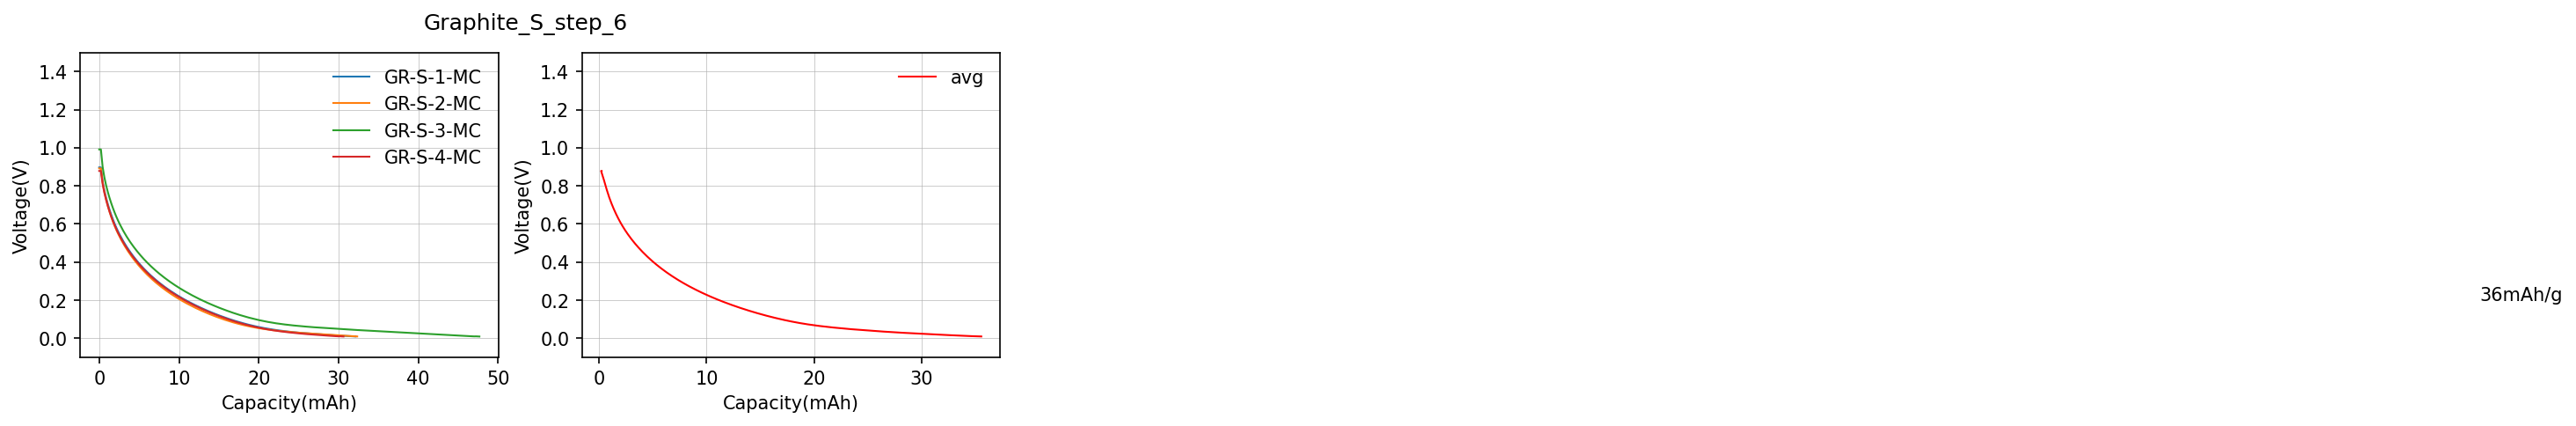

In [4]:
fig, ax = plt.subplots(dpi=150, figsize=(9,3), ncols=2)
avg = []

for i in fileNamesS:
    for j in os.listdir(dischargeFolder):
        if (i in j) and (step in j):
            df = pd.read_csv(os.path.join(dischargeFolder,j))
            ax[0].plot(df['Capacity(Ah)']*1000/w_single, df['Voltage(V)'], label=j.split("_")[5], lw=1)
            avg.append([df['Capacity(Ah)']*1000,df['Voltage(V)']])

# check the smallest range among the files for V the interpolation
v_low= []
v_up = []
for i in avg:
    v_low.append(i[1].iloc[-1])
    v_up.append(i[1].iloc[0])

v_min = max(v_low)
v_max = min(v_up)


size = len(avg)
voltage = np.zeros(50000) #fixed size
capacity = np.zeros(50000) #fixed size because of interp1d later on
for i in avg:
    v = i[1]
    c = i[0]
    f = interpolate.interp1d(v,c)
    v_new = np.linspace(v_min, v_max, 50000)
    c_new = f(v_new)
    voltage = voltage + v_new
    capacity = capacity + c_new

ax[1].plot(capacity/size/w_single, voltage/size, label="avg", lw=1, color='red')
ax[1].text(x=175, y=0.2, s="{:.0f}mAh/g".format(capacity[0]/size/w_single))

plt.suptitle(f"Graphite_S_{step}")

for i in ax.ravel():
    i.set_ylim(-0.1, 1.5)
    i.set_xlabel("Capacity(mAh)")
    i.set_ylabel("Voltage(V)")
    i.grid(":", lw=0.3)
    i.legend(frameon=False)

plt.tight_layout()
plt.show()

C:\Users\Mattia Colalongo\AppData\Local\Temp\ipykernel_19444\2745120606.py:49: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


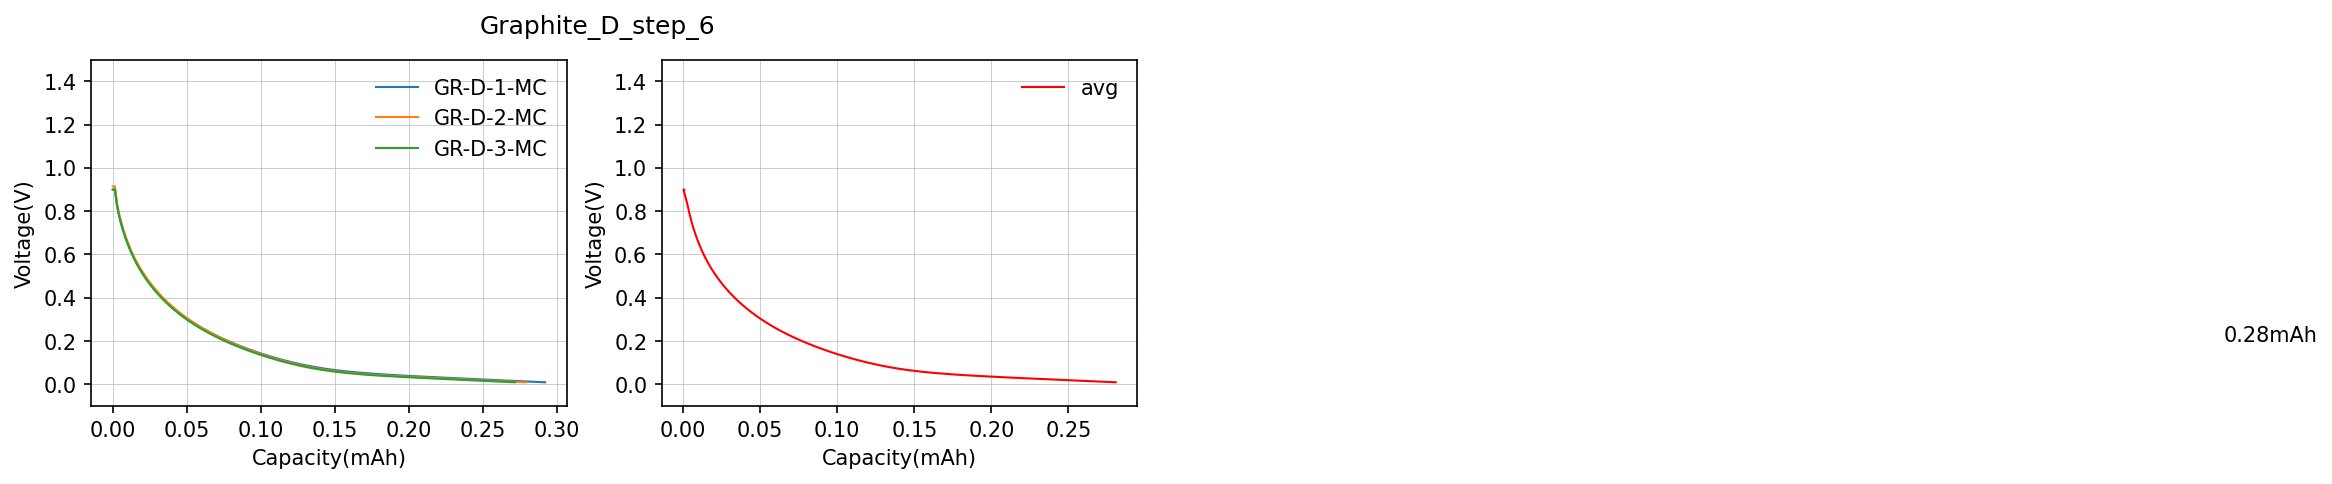

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(dpi=150, figsize=(9,3), ncols=2)
avg = []

for i in fileNamesD:
    for j in os.listdir(dischargeFolder):
        if (i in j) and (step in j):
            df = pd.read_csv(os.path.join(dischargeFolder,j))
            ax[0].plot(df['Capacity(Ah)']*1000, df['Voltage(V)'], label=j.split("_")[5], lw=1)
            avg.append([df['Capacity(Ah)']*1000,df['Voltage(V)']])

            
# check the smallest range among the files for V the interpolation
v_low= []
v_up = []
for i in avg:
    v_low.append(i[1].iloc[-1])
    v_up.append(i[1].iloc[0])

v_min = max(v_low)
v_max = min(v_up)


size = len(avg)
voltage = np.zeros(50000) #fixed size
capacity = np.zeros(50000) #fixed size because of interp1d later on
for i in avg:
    v = i[1]
    c = i[0]
    f = interpolate.interp1d(v,c)
    v_new = np.linspace(v_min, v_max, 50000)
    c_new = f(v_new)
    voltage = voltage + v_new
    capacity = capacity + c_new

ax[1].plot(capacity/size, voltage/size, label="avg", lw=1, color='red')
 

plt.suptitle(f"Graphite_D_{step}")

for i in ax.ravel():
    i.set_ylim(-0.1, 1.5)
    i.set_xlabel("Capacity(mAh)")
    i.set_ylabel("Voltage(V)")
    i.grid(":", lw=0.3)
    i.legend(frameon=False)

plt.tight_layout()
plt.show()